In [1]:
!gdown 197o1N8bhoNT-1O9Zx6ZOZ4P6tmrMwW0j -O data.zip
!unzip data.zip
!rm data.zip
!mv "SoyField-1 - Copia" data
!mv data/TRN data/train
!mv data/TST data/test

Streaming output truncated to the last 5000 lines.
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk0_7.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk0_8.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk0_9.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_0.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_1.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_10.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_11.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_12.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_2.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_3.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_4.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_5.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_6.png  
  inflating: SoyField-1 - Copia/TST/3/image_3_26_A_chunk1_7.png  
  inflating: SoyField-

In [72]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 21.7 MB/s eta 0:00:00


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
input_shape = (244, 251, 3)  # Dimensões das imagens (altura, largura, canais RGB)

In [59]:
model = Sequential([
    # Deep
    Input(input_shape),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),

    # Dense
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(8, activation='softmax')  # 8 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 242, 249, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 121, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 121, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 119, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 59, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 59, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 57, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 103936)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      13,303,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,398,216 (51.11 MB)

 Trainable params: 13,398,216 (51.11 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


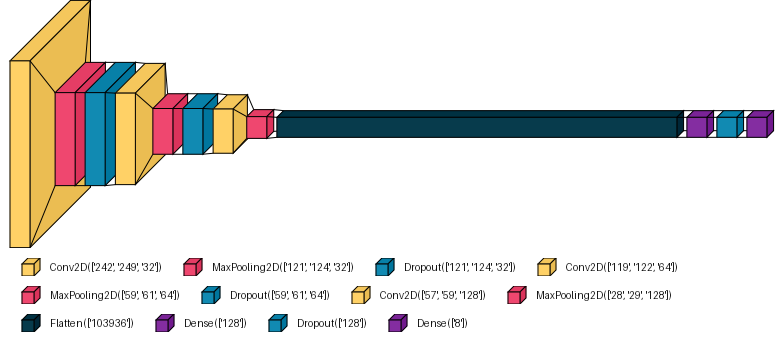

In [75]:
import visualkeras as vk

vk.layered_view(model, scale_xy=0.75, legend=True, show_dimension=True)

In [61]:
batch_size = 64
epochs = 10

In [62]:
train_dir = '/content/data/train'
test_dir = '/content/data/test'


train_datagen = ImageDataGenerator(
    rescale=1.0/255,                 # Normaliza os valores dos pixels
    rotation_range=15,               # Rotação aleatória entre -15 e 15 graus
    width_shift_range=0.1,           # Deslocamento horizontal de até 10% da largura
    height_shift_range=0.1,          # Deslocamento vertical de até 10% da altura
    brightness_range=[0.8, 1.2],     # Variar o brilho em 80%-120%
    zoom_range=0.2,                  # Zoom de até 20% para dentro ou para fora
    shear_range=0.15,                # Inclinação de até 15%
    horizontal_flip=True,            # Inversão horizontal aleatória
    fill_mode='nearest'              # Preenchimento de áreas vazias
)

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Apenas normalização

# Gerador de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,                       # Caminho para a pasta de treinamento
    target_size=(244, 251),          # Redimensionar as imagens
    batch_size=batch_size,                   # Tamanho do lote ajustado
    class_mode='categorical',        # Saída categórica (para 8 classes)
    shuffle=True                     # Embaralhar os dados
)

# Gerador de teste
test_generator = test_datagen.flow_from_directory(
    test_dir,                        # Caminho para a pasta de teste
    target_size=(244, 251),          # Redimensionar as imagens
    batch_size=batch_size,                   # Mesmo tamanho do lote
    class_mode='categorical',        # Saída categórica
    shuffle=False                    # Não embaralhar para manter a ordem
)

Found 14560 images belonging to 8 classes.
Found 7280 images belonging to 8 classes.


In [63]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

In [64]:
# Original: 1820
print(f"Train images: {train_generator.samples}")
# Original: 910
print(f"Test images: {test_generator.samples}")

print(f"Steps per epoch: {steps_per_epoch}")
print(f"Validation steps: {validation_steps}")

Train images: 14560
Test images: 7280
Steps per epoch: 227
Validation steps: 113


In [65]:
# Early stopping para interromper treinamento quando não houver melhora
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,                     # Interrompe após 3 épocas sem melhora
    restore_best_weights=True       # Restaura os melhores pesos
)

# Reduz a taxa de aprendizado se a validação estabilizar
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,                     # Reduz LR pela metade
    patience=2,                     # Espera 2 épocas antes de reduzir
    min_lr=1e-6                     # Define a LR mínima
)

# Treinamento do modelo
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


227/227 ━━━━━━━━━━━━━━━━━━━━ 2881s 13s/step - accuracy: 0.4265 - loss: 3.8292 - val_accuracy: 0.8267 - val_loss: 1.0170 - learning_rate: 0.0010
Epoch 2/10
  1/227 ━━━━━━━━━━━━━━━━━━━━ 36:08 10s/step - accuracy: 0.7969 - loss: 1.1335

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7969 - loss: 1.1335 - val_accuracy: 0.9792 - val_loss: 1.0123 - learning_rate: 0.0010
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 2881s 13s/step - accuracy: 0.7903 - loss: 1.0298 - val_accuracy: 0.9195 - val_loss: 0.6858 - learning_rate: 0.0010
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7969 - loss: 0.8376 - val_accuracy: 0.8542 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 2887s 13s/step - accuracy: 0.8381 - loss: 0.7528 - val_accuracy: 0.9499 - val_loss: 0.5517 - learning_rate: 0.0010
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.8438 - loss: 0.6847 - val_accuracy: 0.8750 - val_loss: 0.5286 - learning_rate: 0.0010
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 2843s 12s/step - accuracy: 0.8448 - loss: 0.6607 - val_accuracy: 0.8638 - val_loss: 0.5617 - learning_rate: 0.0010
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8438 - loss: 0.63

Text(0.5, 0.98, 'Model training')

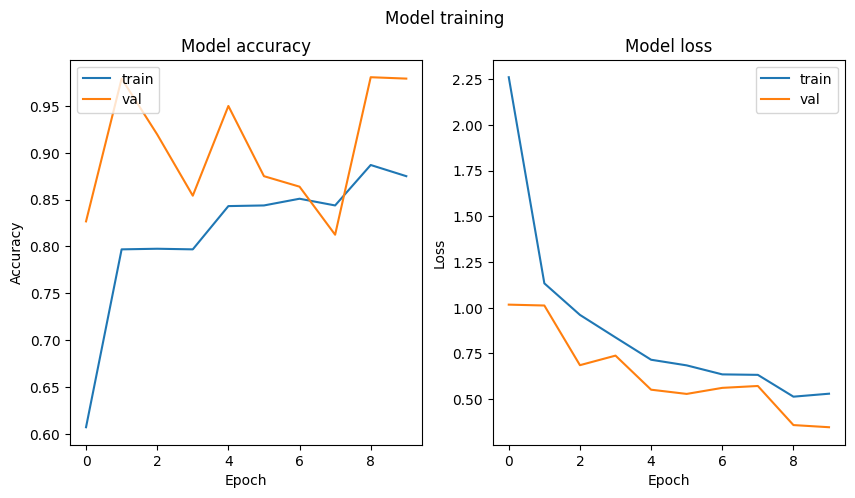

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'val'], loc='upper right')

fig.suptitle('Model training')

In [67]:
test_generator.reset()  # Garante que as imagens do gerador sejam lidas desde o início
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

predicted_classes = predictions.argmax(axis=1)
actual_classes = test_generator.classes[:len(predicted_classes)]

accuracy = (predicted_classes == actual_classes).mean()

num_classes = test_generator.num_classes

# Avaliação por classe
results_per_class = {}
for cur_class in range(num_classes):
    # Índices das imagens da classe atual
    class_index = np.where(actual_classes == cur_class)[0]

    # Total de imagens da classe atual
    class_total = len(class_index)

    if class_total > 0:
        # Imagens corretamente classificadas
        class_correct = np.sum(predicted_classes[class_index] == actual_classes[class_index])

        # Percentual de acerto
        correct_percentage = (class_correct / class_total) * 100
        results_per_class[cur_class] = correct_percentage
    else:
        results_per_class[cur_class] = None

113/113 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step


In [76]:
print(f"Overall accuracy: {accuracy * 100:.2f}%\n")

Overall accuracy: 97.93%



In [77]:
print("\n Results per class:")
for cur_class, percentage in results_per_class.items():
    if percentage is not None:
        print(f" - Stage {cur_class + 1}: {percentage:.2f}%")


 Results per class:
 - Stage 1: 99.23%
 - Stage 2: 96.59%
 - Stage 3: 97.69%
 - Stage 4: 97.58%
 - Stage 5: 100.00%
 - Stage 6: 94.51%
 - Stage 7: 99.67%
 - Stage 8: 98.14%


In [78]:
report = classification_report(actual_classes, predicted_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.98      0.97      0.97       910
           2       0.94      0.98      0.96       910
           3       1.00      0.98      0.99       910
           4       1.00      1.00      1.00       910
           5       1.00      0.95      0.97       910
           6       0.94      1.00      0.97       910
           7       0.99      0.98      0.99       862

    accuracy                           0.98      7232
   macro avg       0.98      0.98      0.98      7232
weighted avg       0.98      0.98      0.98      7232



[Text(0.5, 23.52222222222222, 'Actual class'),
 Text(50.722222222222214, 0.5, 'Predicted class')]

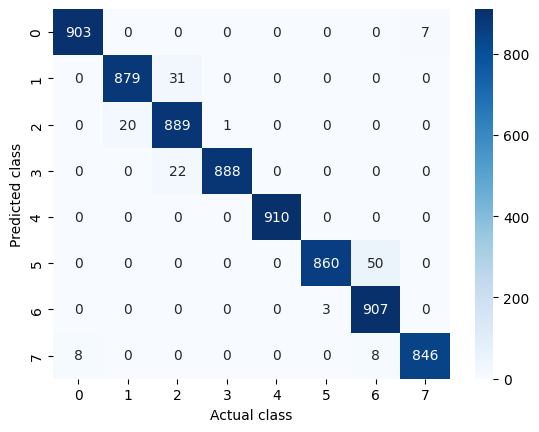

In [80]:
cm = confusion_matrix(actual_classes, predicted_classes)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")
ax.set(xlabel='Actual class', ylabel='Predicted class')